In [2]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import time
from datetime import datetime

In [36]:
#!/usr/bin python
import os
import sys
import pandas as pd

annotation_path = '/mnt/Storage2/home/dongxin/Projects/scATAC/reference/giggle.all/CistromeDB.sample.annotation.txt'
anno_table = pd.read_csv(annotation_path,sep="\t")
factorid = list(map(str,anno_table[(anno_table["FactorType"]=='tf')]["ID"].tolist()))
factor_dict = anno_table[(anno_table["FactorType"]=='tf')][["ID","Factor"]].set_index("ID").to_dict()["Factor"]

# startchr = "A"

# path = '/mnt/Storage/home/dongxin/Storage2/Projects/scATAC/GSM4499028_peakPerCell/giggle_result/%s/' % startchr
# bigdict = dict()

# for giggle_result in os.listdir(path):
#     print("processing %s " % giggle_result)
#     cell_bc = giggle_result.split('_')[0]
#     dtframe = pd.read_csv(path + giggle_result, sep="\t", index_col=None, comment="#", header=None)
#     dtframe.columns = ["file", "file_size","overlaps","odds_ratio","fishers_two_tail","fishers_left_tail","fishers_right_tail","combo_score","NA"]
#     dtframe = dtframe.loc[:,["file", "overlaps","combo_score"]]

#     idList = []
#     for i in dtframe['file']:
#         idList.append(i.replace("/liulab/cwan/Cistrome/MAESTRO/giggle_index/bed_bgzip//human/","").replace("_5foldPeak.bed.gz",""))
#     dtframe["id"] = idList
#     tfdtframe = dtframe[dtframe["id"].isin(factorid)][["id", 'overlaps', 'combo_score']]

#     tfdtframe = tfdtframe.copy()
#     tfdtframe.loc[:,"Factor"] = None
#     print("mapping factor name to %s" % cell_bc)
#     for i in tfdtframe["id"]:
#         tfdtframe.loc[tfdtframe["id"] == i, "Factor"] = factor_dict[int(i)]
#     print("mapping finished!")
#     score = tfdtframe.set_index("id").groupby('Factor').mean()
#     bigdict[cell_bc] = score["combo_score"].to_dict()
#     print("Done!")

# pd.DataFrame.from_dict(bigdict).to_csv("/mnt/Storage/home/dongxin/Storage2/Projects/scATAC/GSM4499028_peakPerCell/result/%s.txt" % startchr, sep="\t")

----------
## factor statistic

In [217]:
annotation_path = '/mnt/Storage2/home/dongxin/Projects/scATAC/reference/giggle.all/CistromeDB.sample.annotation.txt'
anno_table = pd.read_csv(annotation_path,sep="\t")
factorid = list(map(str,anno_table[(anno_table["FactorType"]=='tf')]["ID"].tolist()))
factor_dict = anno_table[(anno_table["FactorType"]=='tf') & (anno_table["Species"]=='Homo sapiens')][["ID","Factor"]].set_index("ID").to_dict()["Factor"]
path = '/mnt/Storage/home/dongxin/Storage2/Projects/scATAC/10X_ATAC/per_100_cell_peak/giggle_result/'
bigdict = dict()

In [165]:
stas_dict = {}
for i in factor_dict:
    if factor_dict[i] in stas_dict:
        stas_dict[factor_dict[i]] += 1
    else:
        stas_dict[factor_dict[i]] = 1
    

In [ ]:
anno_table[anno_table["ID"]==50]

In [ ]:
factor_dict

In [200]:
cnt_factor_table = pd.DataFrame(stas_dict, index=["count"]).T.sort_values("count",ascending=False)

In [ ]:
cnt_factor_table["count"]

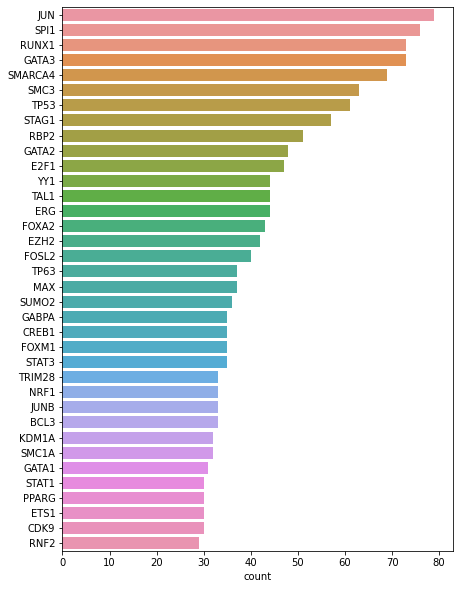

In [207]:
fig, ax = plt.subplots(figsize=(7, 10))
ax = sns.barplot(cnt_factor_table["count"][14:50], cnt_factor_table.index.tolist()[14:50])
fig.show()

-----------
## read per cell (cluster) with raw giggle score

In [218]:
for i in range(len(os.listdir(path))):
    giggle_result = os.listdir(path)[i]
    cell_bc = giggle_result.split('.')[0]
    print(cell_bc)
    dtframe = pd.read_csv(path + giggle_result, sep="\t", index_col=None, comment="#", header=None)
    dtframe.columns = ["file", "file_size","overlaps","odds_ratio","fishers_two_tail","fishers_left_tail","fishers_right_tail","combo_score","NA"]
    if i == 0:
        dtframe = dtframe.loc[:,["file", "combo_score"]]
        total = dtframe.rename(columns={'combo_score':cell_bc}).copy()
    else:
        newcol = dtframe[["combo_score"]]
#         print(newcol)
        total[cell_bc] = newcol
    
idList = []
for i in dtframe['file']:
    idList.append(i.replace("/liulab/cwan/Cistrome/MAESTRO/giggle_index/bed_bgzip//human/","").replace("_5foldPeak.bed.gz",""))
total["id"] = idList

0_6
0_7
0_8
0_9
10_1
10_2
1_10
1_11
11_1
1_1
12_1
1_2
1_3
1_4
1_5
1_6
1_7
1_8
1_9
2_1
2_2
2_3
2_4
2_5
2_6
2_7
2_8
2_9
3_1
3_2
3_3
3_4
3_5
3_6
3_7
3_8
4_1
4_2
4_3
4_4
4_5
4_6
4_7
4_8
5_1
5_2
5_3
5_4
5_5
5_6
5_7
6_1
6_2
6_3
6_4
6_5
6_6
7_1
7_2
7_3
7_4
7_5
8_1
8_2
8_3
8_4
8_5
9_1
9_2
9_3
9_4
9_5
0_10
0_11
0_12
0_13
0_1
0_2
0_3
0_4
0_5


In [219]:
total = total[total["id"].isin(factorid)].copy()

In [ ]:
total

In [221]:
total.loc[:,"Factor"] = None
for i in total["id"]:
    total.loc[total["id"] == i, "Factor"] = factor_dict[int(i)]
print("mapping finished!")

mapping finished!


In [222]:
score_max = total.set_index("id").groupby('Factor').max().iloc[:,1:]
score_mean = total.set_index("id").groupby('Factor').mean()

In [223]:
score_mean.to_csv("10X_ATAC/per_100_cell_peak/per_100_cell_peak_all_giggle_score_mean.txt", sep="\t")
score_max.to_csv("10X_ATAC/per_100_cell_peak/per_100_cell_peak_all_giggle_score_max.txt", sep="\t")

In [130]:
score_max

,GAAACAAGTTTCACCC,AAACGAAAGACACGGT,GAAACAAGTTACACTG,TAAACCGAGATGGGAA,AAACGAAGTTTGACCA,CAAAGCTAGAACTAAC,TAAACCGGTAGCGAGT,AAACGAAAGAGGTGGG,AAACGAAGTGATTCCA,GAAACAAAGAGATTAC,...,TTTGTGTAGAGCACTG,TTTGTGTAGGATTGAT,TTTGTGTCAAACCTAC,TTTGTGTCACTCCTCA,TTTGTGTCATTAAGGA,TTTGTGTGTCCTATTT,TTTGTGTGTGCGTTTA,TTTGTGTGTGGCGCTT,TTTGTGTTCCGTTTCG,TTTGTGTTCGCGCTGA
Factor,,,,,,,,,,,,,,,,,,,,,
ADNP,1044.849752,1068.973476,1021.485211,971.303901,1044.852088,1035.482018,1061.545386,1038.945079,1012.950027,1030.053020,...,994.971112,1018.843680,992.843341,964.771021,993.336008,1014.373661,1018.559576,1042.472010,1042.206605,1065.934348
AEBP2,352.827567,179.758848,137.661176,102.013978,158.420296,275.535652,175.601263,155.468134,191.653187,189.598085,...,101.790691,148.587704,152.574898,140.165354,195.317659,63.964669,341.588502,278.093654,221.165023,201.065969
AFF1,1580.280058,1649.939949,1572.784219,1469.684737,1589.505005,1597.567722,1595.384419,1450.182718,1543.661792,1542.914741,...,1480.140150,1488.636924,1459.418454,1387.768737,1482.439556,1456.802609,1515.388475,1634.165454,1631.197193,1604.804356
AFF4,1828.855807,1911.799864,1787.260720,1611.687544,1836.473912,1836.898090,1893.084079,1630.051075,1724.623986,1698.887786,...,1637.684451,1639.641285,1643.422493,1513.520403,1655.719949,1608.942844,1696.945906,1910.283060,1882.059240,1862.784947
AGO1,1460.814311,1513.929596,1433.792252,1370.954623,1461.541908,1458.200233,1490.517567,1389.371245,1436.257336,1416.848321,...,1381.347501,1401.757340,1364.764460,1329.927829,1391.674142,1355.939655,1425.370270,1499.023084,1493.556616,1495.747282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN5A,1242.032893,1254.522895,1233.405072,1158.831821,1246.768271,1226.421414,1259.752669,1188.940170,1186.946218,1208.131510,...,1185.105810,1160.143431,1172.611692,1111.226972,1206.121729,1080.752725,1185.286960,1237.009330,1255.021483,1242.390042
ZSCAN9,1310.963980,1350.687875,1294.394941,1193.537101,1312.299012,1301.233884,1349.441044,1226.461763,1259.453435,1279.202405,...,1230.415041,1251.403893,1196.865597,1153.715494,1251.358365,1211.355667,1245.596148,1336.379955,1325.004047,1335.352314
ZXDB,1344.723512,1396.836103,1326.914282,1231.512662,1361.699716,1350.398311,1390.105038,1253.530861,1286.285054,1311.532326,...,1272.174138,1263.389352,1235.086662,1159.665489,1271.771965,1256.803252,1300.283329,1388.230154,1373.818318,1371.018658


------
## P value & fold change calculation

In [2]:
# annotation_path = '/mnt/Storage2/home/dongxin/Projects/scATAC/reference/giggle.all/CistromeDB.sample.annotation.txt'
# anno_table = pd.read_csv(annotation_path,sep="\t")
# factorid = list(map(str,anno_table[(anno_table["FactorType"]=='tf')]["ID"].tolist()))
# factor_dict = anno_table[(anno_table["FactorType"]=='tf') & (anno_table["Species"]=='Homo sapiens')][["ID","Factor"]].set_index("ID").to_dict()["Factor"]
bgpath = '/mnt/Storage/home/dongxin/Storage2/Projects/scATAC/10X_ATAC/per_50_cell_peak/motif_index/motif_bg_giggle_result/'
resultpath = '/mnt/Storage/home/dongxin/Storage2/Projects/scATAC/10X_ATAC/per_50_cell_peak/motif_index/motif_giggle_result/'
# bgpath = '/mnt/Storage/home/dongxin/Storage2/Projects/scATAC/BCC_GSE129785/per_50_cell_peak/5fold_bg_giggle_result/'
# resultpath = '/mnt/Storage/home/dongxin/Storage2/Projects/scATAC/BCC_GSE129785/per_50_cell_peak/5fold_giggle_result/'
# bigdict = dict()

In [3]:
def read_giggle_result(path, filename_split="_", index_prefix="top10k/"):
    """For giggle stored path, return a table, col is cell cluster / cell and row is factor"""
    for i in range(len(os.listdir(path))):
        giggle_result = os.listdir(path)[i]
        cell_bc = giggle_result.split(filename_split)[0]
#         print(cell_bc)
        dtframe = pd.read_csv(path + giggle_result, sep="\t", index_col=None, comment="#", header=None)
        dtframe.columns = ["file", "file_size","overlaps","odds_ratio","fishers_two_tail","fishers_left_tail","fishers_right_tail","combo_score","NA"]
        if i == 0:
            dtframe = dtframe.loc[:,["file", "combo_score"]]
            total = dtframe.rename(columns={'combo_score':cell_bc}).copy()
        else:
            newcol = dtframe[["combo_score"]]
#             print(newcol)
            total[cell_bc] = newcol
    idList=[]
    for i in total['file']:
        idList.append(i.replace(index_prefix,"").replace(".bed.gz",""))
    total = total.rename(columns={"file":"id"})
    total["id"] = idList
    total = total.set_index("id")
    return total

def cal_hist_auc(arrays, bins = 500):
    """Calculate the AUC of the arrays distribution
    """
    y_score = np.array(arrays)
    hist = arrays.value_counts(bins=bins)
    hist = hist.sort_index()
    append_right = hist.index[bins-1].right
    hist.index = hist.index.left
#     bins is the regions, like [1100, 1200, 1300 ...]
    bins = np.asarray(hist.index)
    # bins[0] = bins[1] - np.diff(bins)[1]
    bins = np.append(bins, append_right)
#     values is the height of each bins, like [0, 0, 1, 2, 0, 1 ...]
    values = np.asarray(hist.values)
    area = sum(np.diff(bins)*values)
    return area, bins, values

def find_bin_idx_of_value(bins, value):
    """Finds the bin which the value corresponds to."""
    array = np.asarray(value)
    idx = np.digitize(array, bins)
    return idx-1

def area_after_val(values, bins, val):
    """Calculates the area of the hist after a certain value"""
    left_bin_edge_index = find_bin_idx_of_value(bins, val)
#     bin_width = np.diff(bins)[1]
#     print(bin_width)
    area = sum(np.diff(bins)[left_bin_edge_index:] * values[left_bin_edge_index:])
    return area

In [4]:
bgtable = read_giggle_result(bgpath, filename_split=".", index_prefix="motif_bed/")

In [6]:
result_table = read_giggle_result(resultpath, filename_split=".", index_prefix="motif_bed/")

In [7]:
result_table_p = result_table.copy()
result_table_fc = result_table.copy()

In [5]:
bgtable

,164,1000,165,100,167,101,166,102,168,103,...,992,993,994,995,996,997,998,999,99,9
id,,,,,,,,,,,,,,,,,,,,,
AC023509,798.469113,781.837033,796.105441,801.511202,799.642039,817.589528,807.548916,800.267416,792.524468,803.375338,...,796.090363,795.884059,802.805914,800.871928,801.007361,814.051663,791.355208,799.180721,796.579249,810.384483
AC138696,22.539580,23.726693,23.958305,16.262794,18.388619,17.056740,22.318949,23.489793,16.515754,24.309512,...,27.116114,31.823774,21.499409,17.084701,24.616714,21.511231,21.369026,24.982245,22.219249,16.909134
AHR,349.063349,316.004632,333.794903,359.891359,330.354546,364.889187,344.341624,380.442153,362.204852,346.917061,...,398.792883,380.588572,364.947453,417.419849,351.696602,367.362363,412.859591,344.718637,316.380914,348.607594
AIRE,-6.896614,-4.411713,-5.722442,-10.035319,-5.382650,-6.484254,-10.600742,-10.601927,-7.764803,-8.097539,...,-5.382904,-10.565101,-10.064310,-7.293510,-6.135368,-4.985852,-4.725004,-3.994173,-9.102980,-4.096181
BACH1,1.994998,6.548564,1.293378,3.641423,2.990702,2.031457,1.530863,2.439417,5.972127,1.759290,...,2.988643,3.709371,4.502200,2.891211,4.524874,2.691520,2.775317,2.306351,2.804467,3.348214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFP82,-2.890346,-2.093526,-3.791053,-2.871757,-1.529344,-1.507497,-5.294151,-2.589498,-1.747055,-1.971396,...,-2.787535,-3.240212,-2.262184,-2.448680,-1.391140,-2.397018,-2.269641,-3.858420,-3.367846,-4.241535
ZFP90,-11.967385,-13.730789,-7.899879,-11.612903,-14.510554,-16.777285,-10.526332,-12.750090,-16.724115,-11.293262,...,-11.713338,-8.630573,-9.813770,-12.709001,-13.296137,-10.549300,-9.830219,-11.593533,-7.163733,-12.903560
ZFX,1232.824353,1230.578244,1222.732751,1234.777070,1239.923657,1225.624770,1230.789037,1228.842072,1229.399015,1227.847995,...,1229.653660,1217.974225,1237.807993,1230.379419,1229.226173,1233.139567,1232.826271,1234.029603,1228.418473,1232.795929


In [8]:
# calculate p value by area at the right of curve
# calculate fc by value / background average

start_time = datetime.now()
print(start_time)
cnt = 0
for factor in result_table.index:
    factor_bg = bgtable.loc[factor,:]
    distribution_mean = np.mean(factor_bg)
    area, bins, values = cal_hist_auc(factor_bg, bins=1000)
    cnt += 1
    if cnt%50 == 0:
        print("INFO %s, finished %.2f %%" % (datetime.now(), cnt*100/result_table.index.__len__()))
    for c in result_table.columns:
        value = result_table.loc[factor, c]
        # cal p value
        pvalue = area_after_val(values, bins, value)/area
        if pvalue > 1:
            pvalue = 1.0
        result_table_p.loc[factor, c] = pvalue
        # cal fc
        if distribution_mean*value < 0: # if mean and value are opposite
            fc = distribution_mean / (distribution_mean - value)
        elif distribution_mean == 0:
            fc = value
        else:
            fc = value / distribution_mean
#         else:
#             if value <= 0:
#                 fc = distribution_mean / (distribution_mean - value)
#             else:
#                 fc = value / distribution_mean
        result_table_fc.loc[factor, c] = fc

end_time = datetime.now()
print(end_time - start_time)

2020-10-12 09:58:39.503499
INFO 2020-10-12 09:58:53.083166, finished 18.25 %
INFO 2020-10-12 09:59:08.264068, finished 36.50 %
INFO 2020-10-12 09:59:20.631977, finished 54.74 %
INFO 2020-10-12 09:59:32.940529, finished 72.99 %
INFO 2020-10-12 09:59:46.473139, finished 91.24 %
0:01:13.116964


In [13]:
factor_index_list

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 

In [12]:
# map factor by id "_"
factor_index_list = []
for i in result_table_p.index:
    factor_name = i.split("_")
    if len(factor_name) != 2:
        try:
            factor_index_list.append(factor_dict[int(factor_name[0])])
        except:
            print(factor_name)
            factor_index_list.append("None")
    else:
        factor_index_list.append(factor_name[1])

['AC023509']
['AC138696']
['AHR']
['AIRE']
['BACH1']
['BACH2']
['BARHL1']
['CCDC169-SOHLH2']
['CDC5L']
['CDX1']
['CDX2']
['CDX4']
['CEBPA']
['CEBPB']
['CEBPD']
['CEBPE']
['CEBPG']
['CENPB']
['CENPBD1']
['CIC']
['CLOCK']
['CREB1']
['CREB3']
['CREB3L1']
['CREB3L2']
['CREB3L4']
['CREB5']
['CREBL2']
['CREBZF']
['CREM']
['CRX']
['CTCFL']
['DBP']
['DBX1']
['DBX2']
['DDIT3']
['DLX1']
['E2F1']
['E2F2']
['E2F3']
['E2F4']
['E2F5']
['E2F6']
['E2F7']
['E2F8']
['EBF1']
['EBF2']
['EBF3']
['EBF4']
['EGR1']
['EGR2']
['EGR3']
['FBXL19']
['FERD3L']
['FEV']
['FEZF1']
['FEZF2']
['FIGLA']
['FLI1']
['FOS']
['FOSB']
['FOSL1']
['FOSL2']
['FOXA1']
['GABPA']
['GATA1']
['GATA2']
['GATA3']
['GATA4']
['HAND1']
['HAND2']
['HBP1']
['HDX']
['HES1']
['HES2']
['HES4']
['HES5']
['HES6']
['HES7']
['HEY1']
['HEY2']
['HEYL']
['HHEX']
['HIC1']
['HIC2']
['HIF1A']
['HINFP']
['HKR1']
['HLF']
['HLX']
['HMBOX1']
['HMG20A']
['HMG20B']
['HMGA1']
['HMGA2']
['IKZF1']
['IKZF2']
['IKZF3']
['INSM1']
['IRF1']
['IRF2']
['IRF3']
['IRF4']


In [10]:
result_table_p

,3_12,0_10,3_13,0_11,3_15,0_12,3_14,0_13,3_16,0_14,...,3_4,3_5,3_6,3_7,3_8,3_9,4_10,4_11,4_12,4_13
id,,,,,,,,,,,,,,,,,,,,,
AC023509,0.990000,0.879112,0.994995,0.000999,0.996993,0.997992,0.992997,0.996993,0.042957,0.000999,...,0.996993,0.990000,0.956035,0.996993,0.898093,0.971019,0.000999,0.000999,0.838154,0.000999
AC138696,0.193985,0.965915,0.070927,0.958981,0.103843,0.914035,0.103843,0.800042,0.997953,0.992941,...,0.065998,0.346825,0.118881,0.722264,0.815079,0.578446,0.839098,0.737302,0.462573,0.988931
AHR,0.180798,0.988016,0.087909,0.998000,0.080917,0.993008,0.011984,0.994011,0.995008,0.996005,...,0.003989,0.110885,0.086912,0.005989,0.056944,0.175795,0.000997,0.000997,0.615375,1.000000
AIRE,0.339336,0.008004,0.592451,0.506412,0.793270,0.000000,0.875307,0.237926,0.414370,0.009004,...,0.697226,0.236926,0.592451,0.592451,0.779263,0.442383,0.029013,0.006003,0.351342,0.020009
BACH1,0.001956,0.010840,0.237917,0.000000,0.035863,0.025022,0.478931,0.001956,0.505665,0.142147,...,0.251691,0.204173,0.114190,0.114190,0.092428,0.166191,0.000978,0.000978,0.945554,0.857201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFP82,0.867904,0.735080,0.555192,0.295002,0.844129,0.156235,0.616084,0.068413,0.003033,0.003033,...,0.769044,0.616084,0.969554,0.969554,0.817564,0.844129,0.158176,0.006065,0.483988,0.155143
ZFP90,0.870971,0.001973,0.759318,0.249616,0.870971,0.023076,0.796371,0.039027,0.008003,0.000000,...,0.986790,0.950998,0.924139,0.997917,0.575751,0.298290,0.001973,0.000987,0.427373,0.021103
ZFX,0.842109,0.000998,0.932044,0.000998,0.919069,0.000998,0.813121,0.000998,0.980993,0.000998,...,0.874091,0.950009,0.776171,0.914013,0.840113,0.895050,0.000998,0.000998,0.996984,0.000998


In [11]:
# output p value by minimum - giggle
result_table_p["Factor"] = factor_index_list
result_table_p.groupby("Factor").min().to_csv("10X_ATAC/per_50_cell_peak/motif_index/result_p.txt", sep = "\t")

# output fc value by maxmium - giggle
result_table_fc["Factor"] = factor_index_list
result_table_fc.groupby("Factor").max().to_csv("10X_ATAC/per_50_cell_peak/motif_index/result_fc.txt", sep = "\t")

NameError: name 'factor_index_list' is not defined

In [14]:
# output p value by minimum - giggle
result_table_p.to_csv("10X_ATAC/per_50_cell_peak/motif_index/result_p.txt", sep = "\t")

# output fc value by maxmium - giggle
result_table_fc.to_csv("10X_ATAC/per_50_cell_peak/motif_index/result_fc.txt", sep = "\t")

5888

In [652]:
factor_index_list

['EOMES',
 'EP300',
 'EZH2',
 'FOXH1',
 'FOXH1',
 'FOXP1',
 'FOXP1',
 'RNF2',
 'SMAD2or3',
 'SMAD2or3',
 'SMAD3',
 'SMAD3',
 'SMAD4',
 'SMAD4',
 'POLR3G',
 'ELK4',
 'TRIM28',
 'TRIM28',
 'BDP1',
 'BRF1',
 'BRF2',
 'TCF4',
 'DDX5',
 'E2F1',
 'ELK1',
 'ELK4',
 'GATAD1',
 'GATAD1',
 'LRWD1',
 'GLYR1',
 'TRRAP',
 'C17orf49',
 'CCDC101',
 'GLYR1',
 'TRRAP',
 'C17orf49',
 'CCDC101',
 'GTF3C1',
 'GTF3C1',
 'H2AZ',
 'H2AZ',
 'NR2C2',
 'NR3C1',
 'NR3C1',
 'PHF8',
 'PHF8',
 'POLR2A',
 'POLR3A',
 'POLR3G',
 'POLR3G',
 'POU2F1',
 'RELA',
 'RELA',
 'SMARCA4',
 'SMARCB1',
 'SMARCC1',
 'SMARCC2',
 'SMC4',
 'STAT1',
 'ZNF274',
 'ZNF274',
 'CEBPA',
 'CEBPA',
 'CTCF',
 'HNF4A',
 'HNF4G',
 'NR2C2',
 'STAG1',
 'STAG1',
 'ZNF274',
 'PHF8',
 'PHF8',
 'FOS',
 'GATA2',
 'RBPJ',
 'RBPJ',
 'SND1',
 'SND1',
 'BDP1',
 'BRF1',
 'TERF1',
 'POLR3D',
 'RB1',
 'RB1',
 'RBL2',
 'RBL2',
 'SNAPC2',
 'TERF2',
 'CREBBP',
 'CTCF',
 'ETS1',
 'POLR3G',
 'TAL1',
 'TAL1',
 'BCL6',
 'FOS',
 'FOS',
 'BTAF1',
 'GATA2',
 'JUN',
 'N

-----
## filter bed for giggle index

In [606]:
os.listdir("/mnt/Storage/home/dongxin/temp/cistrome/")

['human_factor_full_QC.txt',
 'human_factor_filterQC.txt',
 'human_factor',
 'filter_bed']

In [11]:
QC = pd.read_csv("/mnt/Storage/home/dongxin/Files/cistrome/mouse/mouse_factor_full_QC.txt", sep = "\t")

factor_list

In [12]:
factor_list = QC.Factor.unique().tolist()

In [13]:
for f in factor_list:
    if len(QC[(QC["Factor"] == f)]) > 2:
        need_remove_table_factor = QC[(QC["Factor"] == f)]
        cell_line_list = need_remove_table_factor.Cell_line.unique().tolist()
        for cl in cell_line_list:
            if len(need_remove_table_factor[need_remove_table_factor["Cell_line"] == cl]) > 2:
                need_remove_table_cl = need_remove_table_factor[need_remove_table_factor["Cell_line"] == cl]
                remove_id = list(set(need_remove_table_cl.index.tolist()) - set(need_remove_table_cl.sort_values(by="PeaksFoldChangeAbove10", ascending=False).head(2).index.tolist()))
                QC = QC.drop(index=remove_id)
            else:
                continue
    else:
        continue

In [14]:
QC.to_csv("/mnt/Storage/home/dongxin/Files/cistrome/mouse/mouse_factor_filterQC.txt", index=None, header=True, sep="\t")

In [3]:
QC = pd.read_csv("/mnt/Storage/home/dongxin/temp/cistrome/human_factor_filterQC.txt", sep="\t")

In [7]:
QC["Tissue_type"].unique()

array(['Adipose', 'Muscle', 'Embryo', 'None', 'Spleen', 'Bone Marrow',
       'Testis', 'Blood', 'Liver', 'Fetal Liver', 'Brain',
       'Mammary Gland', 'Embryonic Gonad', 'Skin', 'Bone', 'Lymph Node',
       'Ectoderm', 'Cerebellum', 'Thymus', 'Pituitary', 'Hippocampus',
       'Neuric', 'mature thymocytes', 'lens', 'Cranial', 'Retina',
       'Hindlimb', 'Forelimb', 'Pancreas', 'Colon', 'seedlings',
       'Midbrain', 'Skeletal Muscle'], dtype=object)

In [9]:
QC['Tissue_type']

35       Adipose
37       Adipose
47        Muscle
52        Muscle
53        Muscle
          ...   
10909       None
10913       None
10915       None
10932       None
10934       None
Name: Tissue_type, Length: 1167, dtype: object

In [3]:
filelist = os.listdir("/mnt/Storage/home/dongxin/temp/cistrome/filter_bed/top10k")

In [8]:
factorlist = []
for i in filelist:
    try:
        factor = i.split("_")[1].split(".")[0]
        factorlist.append(factor)
    except IndexError:
        continue       
    

In [18]:
stas_dict = {}
for i in QC.Factor:
    if i in stas_dict:
        stas_dict[i] += 1
    else:
        stas_dict[i] = 1

In [19]:
cnt_factor_table = pd.DataFrame(stas_dict, index=["count"]).T.sort_values("count",ascending=False)

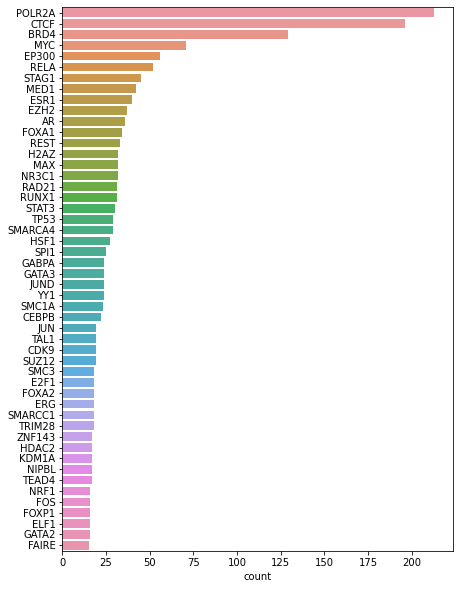

In [11]:
fig, ax = plt.subplots(figsize=(7, 10))
ax = sns.barplot(cnt_factor_table["count"][0:50], cnt_factor_table.index.tolist()[0:50])
fig.show()

In [46]:
diff_factor = list(set(cnt_factor_table.index) - set(new_cnt_factor_table.index))
diff_factor.sort()
for i in range(0,len(diff_factor),10):
#     print(i)
    print("\t".join(list(diff_factor)[i:i+9]))

ADNP2	AHCTF1	ALX4	ARID1B	ARID3B	ARNTL2	ATF6	ATF7	BBX
BTF3	C10orf12	CAMTA1	CASZ1	CCNT1	CDKN1B	CDX1	CEBPE	CGGBP1
CREB3L1	CREB3L2	CREBL2	DDIT3	DICER1	DKK1	DMRT1	DMRT2	EBNA3A
EPO	EVX1	F2RL1	FASN	FERD3L	FOXC1	FOXD3	FOXF1	FOXF2
FOXO4	FOXQ1	FOXR2	GLI1	GLI3	GTF3A	GZF1	HBG1, HBG2	HES5
HESX1	HIC2	HIVEP1	HIVEP3	HMGA1	HN1L	HNRNPL	HOXA10	HOXA7
HOXB2	HOXB4	HOXB5	HOXB8	HOXC11	HOXC13	HOXC6	HOXD1	HOXD11
HOXD4	HOXD9	HP1BP3	HSF4	ID1	ID2	ID4	IGF1R	IKZF5
IRF8	IRX2	IRX3	IRX5	ISL2	JAZF1	KCMF1	LCOR	LHX3
LHX5	LHX6	LMX1B	LOXL1	MAP1LC3A	MAP2K1	MBD1_isoform1	MBD1_isoform2	MEIS2
MIXL1	MSC	MSX2	MTF1	MYBL1	MYF6	NCOA3	NCOA4	NEUROD2
NFATC4	NFE2L3	NFIB	NHLH1	NKX2-3	NKX2-8	NKX6-1	NR1D1	NR1I2
NR4A2	OTX1	PAK1IP1	PAX2	PCF11	PCGF5	PCGF6	PGBD5	PITX1
POLB	PPARA	PRDM4	PRDM9	PWWP2A	RAX2	RLF	RORA	RPA1
SIRT3	SMAD2/3	SMC4	SNAI1	SNAPC4	SOX15	SOX3	SRPK2	TAF15
TEAD1, TEAD4	TFAM	TFCP2	TFDP2	TFE3	TFEB	TGIF1	THAP4	TOE1
TRPS1	UBP1	WIZ	WNT3A	XRCC4	ZBED4	ZBTB39	ZBTB4	ZC3H11A
ZFP1	ZIM2	ZNF181	ZNF205	ZNF212	ZNF214	ZNF235	ZNF236	ZNF25
ZNF3	ZN

In [32]:
set(cnt_factor_table.index).__len__()

1359

In [33]:
set(new_cnt_factor_table.index).__len__()

1150

In [10]:
# rename index bed file
for i in os.listdir("/mnt/Storage/home/dongxin/Files/cistrome/mouse/mouse_hm/"):
    dcid = int(i.split("_")[0])
    factor = QC[QC["DCid"] == dcid]["Factor"].to_string().split()[1]
    if "/" in factor or "_" in factor:
        factor = factor.replace("/", "or").replace("_", "")
#     Cell_line = QC[QC["DCid"] == dcid]["Cell_line"].to_string().split()[1]
#     Cell_type = 
#     Tissue_type
    os.system("cp /mnt/Storage/home/dongxin/Files/cistrome/mouse/mouse_hm/%s_*.bed /mnt/Storage/home/dongxin/Files/cistrome/mouse/mouse_hm_filter_bed/%s_%s.bed" % (dcid,dcid,factor))

In [1]:
QC[QC["DCid"] == 86201]

NameError: name 'QC' is not defined

-----------
## test code

In [49]:
for i in range(0,13):
    rp_table = pd.read_csv("~/Storage2/Projects/scATAC/10X_ATAC/analysis/atac_pbmc_10k_v1_S1_L001/Result/Analysis/peaks/RP/C_%s.txt" % str(i), comment="#", sep = "\t", header=None)
    rp_table = rp_table.iloc[:,[4,6]].groupby(6).max()
    rp_table.columns = ["C%s" % str(i)]
    if i == 0:
        merged_rp_table = rp_table
    else:
        merged_rp_table = pd.concat([merged_rp_table, rp_table], axis=1)

In [62]:
merged_rp_table.index.name = "Factor"

In [63]:
merged_rp_table.to_csv("10X_ATAC/cluster_rp_table.txt", sep="\t")

In [ ]:
dtframe = pd.read_csv(path + giggle_result, sep="\t", index_col=None, comment="#", header=None)

In [184]:
tfdtframe = dtframe[dtframe["id"].isin(factorid)][["id", 'overlaps', 'combo_score']]

tfdtframe = tfdtframe.copy()
tfdtframe.loc[:,"Factor"] = None
for i in tfdtframe["id"]:
    tfdtframe.loc[tfdtframe["id"] == i, "Factor"] = factor_dict[int(i)]

score = tfdtframe.set_index("id").groupby('Factor').mean()

bigdict = dict()
bigdict[cell_bc] = score["combo_score"].to_dict()

In [212]:
bigdict.keys()

dict_keys(['AAACGAAAGACTCGGA', 'AAACGAACAATGAAAC', 'AAACGAACACCACCAG'])